# Our Mission
Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'.

In this mission we will be using the Naive Bayes algorithm to create a model that can classify dataset SMS messages as spam or not spam, based on the training we give to the model. It is important to have some level of intuition as to what a spammy text message might look like. Usually they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. To the recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else. Also, this is a supervised learning problem, as we will be feeding a labelled dataset into the model, that it can learn from, to make future predictions.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data and undersating


In [91]:
# loading data
df = pd.read_csv('D:\Projects\spam or ham\spam.csv',encoding='latin-1')
# reading sample data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning
Now we have sence about how data looks like, lets do data cleaning
1) check for null values
2) Drop duplicates
3) encode categorical values
4) remove unwanted columns
5) rename columns with , sensable names

In [92]:
# information about our data and schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [93]:
# we can see that, there are some useless columns present like "Unnamed : 2","Unnamed : 3" and "Unnamed : 4"
# dropping unwanted column
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [94]:
# check for null values and impute
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [95]:
# check for duplicates
df.duplicated().sum()

403

In [96]:
# There are "403" duplicate values, lets drop them
df.drop_duplicates(inplace=True)

In [97]:
# renaming columns V1 and V2
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace = True)

*encoding values of the column message_type* 

Now that we have a basic understanding of what our dataset looks like, lets convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation.

You might be wondering why do we need to do this step? The answer to this lies in how scikit-learn handles inputs. Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally(more specifically, the string labels will be cast to unknown float values).


In [98]:
# we can also use sklearn's label encoder or can do manualy using map fuction as follows
df['message_type']=df.message_type.map({'ham':0,'spam':1})
print(df.shape)
df.head() # returns (rows, columns)

(5169, 2)


,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Explorotary Data analysis
* lets find out underying patterns and information about data
* Let’s visualise the classification problem to get a better understanding of the data.

In [99]:
x=df['message_type'].value_counts()

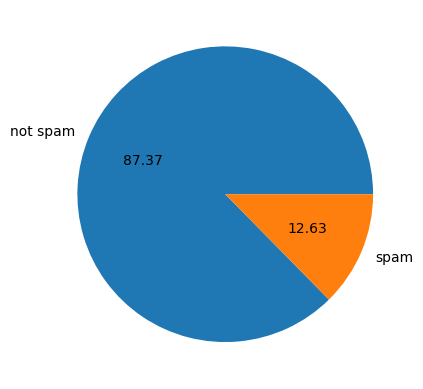

In [100]:
# ploting pie plot to see data distribution
plt.pie(x,labels=['not spam','spam'],autopct='%0.2f',)
plt.show()

from above pie plot we can clearly see that data is imbalanced and choosing evaluation metrics is very important
like 'accuracy' metrics do not give clear view about minority class classified correctly.

In [101]:
# for number of characters
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
df['num_characters']=df['message'].apply(len)
df.head()



,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [103]:
# For a number of words :
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


<Axes: xlabel='num_characters', ylabel='Count'>

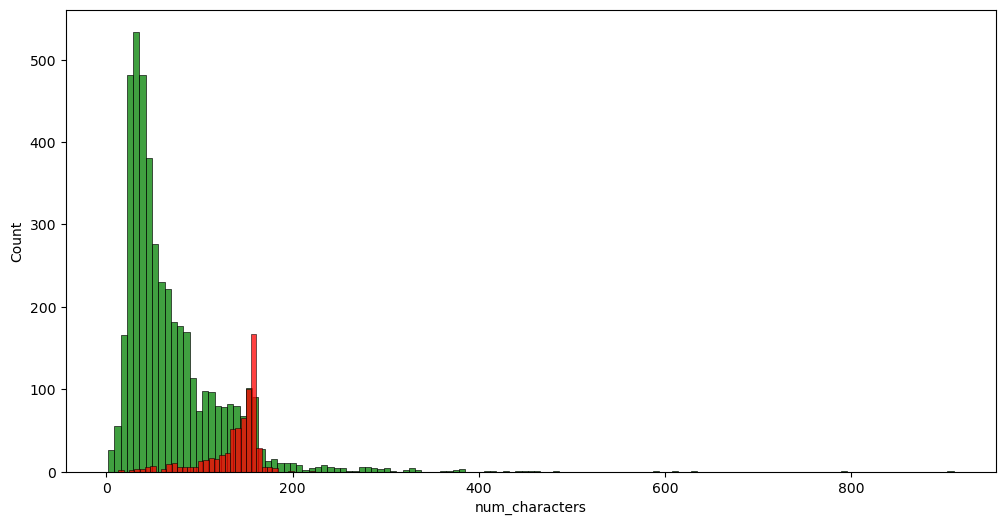

In [104]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

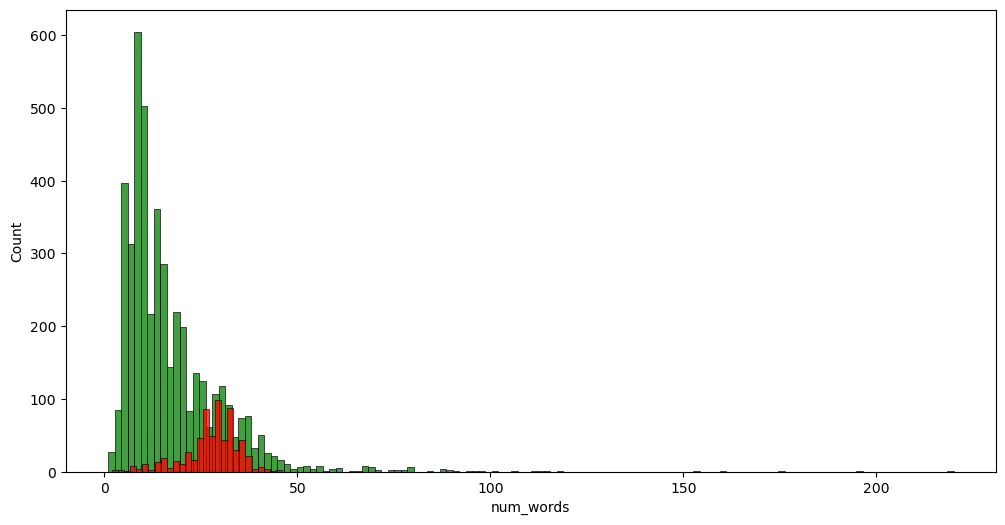

In [105]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

We can clearly see the spam messages are quite longer than the ham messages.

# Bag of Word implementation

* LowerCase
* Tokenisation
* Removing special characters
* Removing stop words and punctuation
* Stemming — lemmatisation

In [106]:
df.head()

,message_type,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [107]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [108]:
#change to lower case
df['message']=df['message'].apply(lambda x : x.lower())


In [109]:
# Tokenize the message
df['trans_msg'] = df['message'].apply(lambda x: ' '.join(nltk.word_tokenize(x)))

In [110]:
# stopword removal and punctuation
stop_words = set(stopwords.words('english')) | set(string.punctuation)

df['trans_msg'] = df['trans_msg'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words and word not in string.punctuation))

In [111]:
# remove alpha numeric and digits
df['trans_msg'] = df['trans_msg'] = df['trans_msg'].str.replace(r'^(?:[A-Za-z-]+\d|[\d-]+[A-Za-z])[\w-]*\s*', '', regex=True)

In [112]:
df.head()

,message_type,message,num_characters,num_words,trans_msg
0,0,"go until jurong point, crazy.. available only ...",111,24,go jurong point crazy .. available bugis n gre...
1,0,ok lar... joking wif u oni...,29,8,ok lar ... joking wif u oni ...
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor... u c already then say...,49,13,u dun say early hor ... u c already say ...
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,nah n't think goes usf lives around though


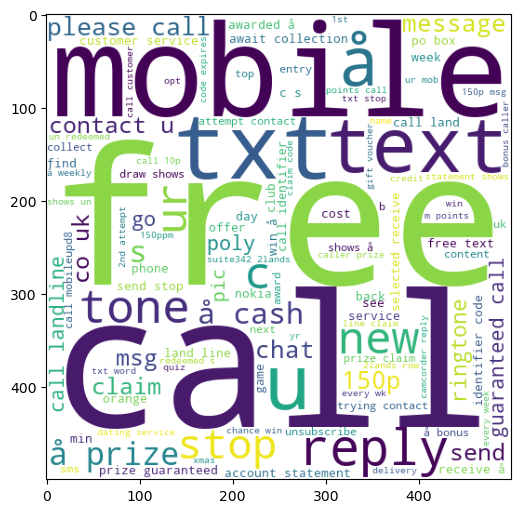

In [113]:
#To get a clear idea about the most frequent words used we make a  word cloud.
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#For Spam:

spam_wc=wc.generate(df[df['message_type']==1]['trans_msg'].str.cat(sep=""))

plt.figure(figsize=(6,12))
plt.imshow(spam_wc)

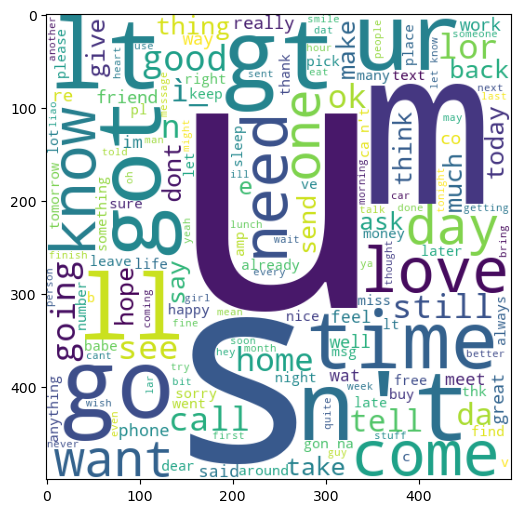

In [114]:
# for ham
spam_wc=wc.generate(df[df['message_type']==0]['trans_msg'].str.cat(sep=""))

plt.figure(figsize=(6,12))
plt.imshow(spam_wc)

* To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

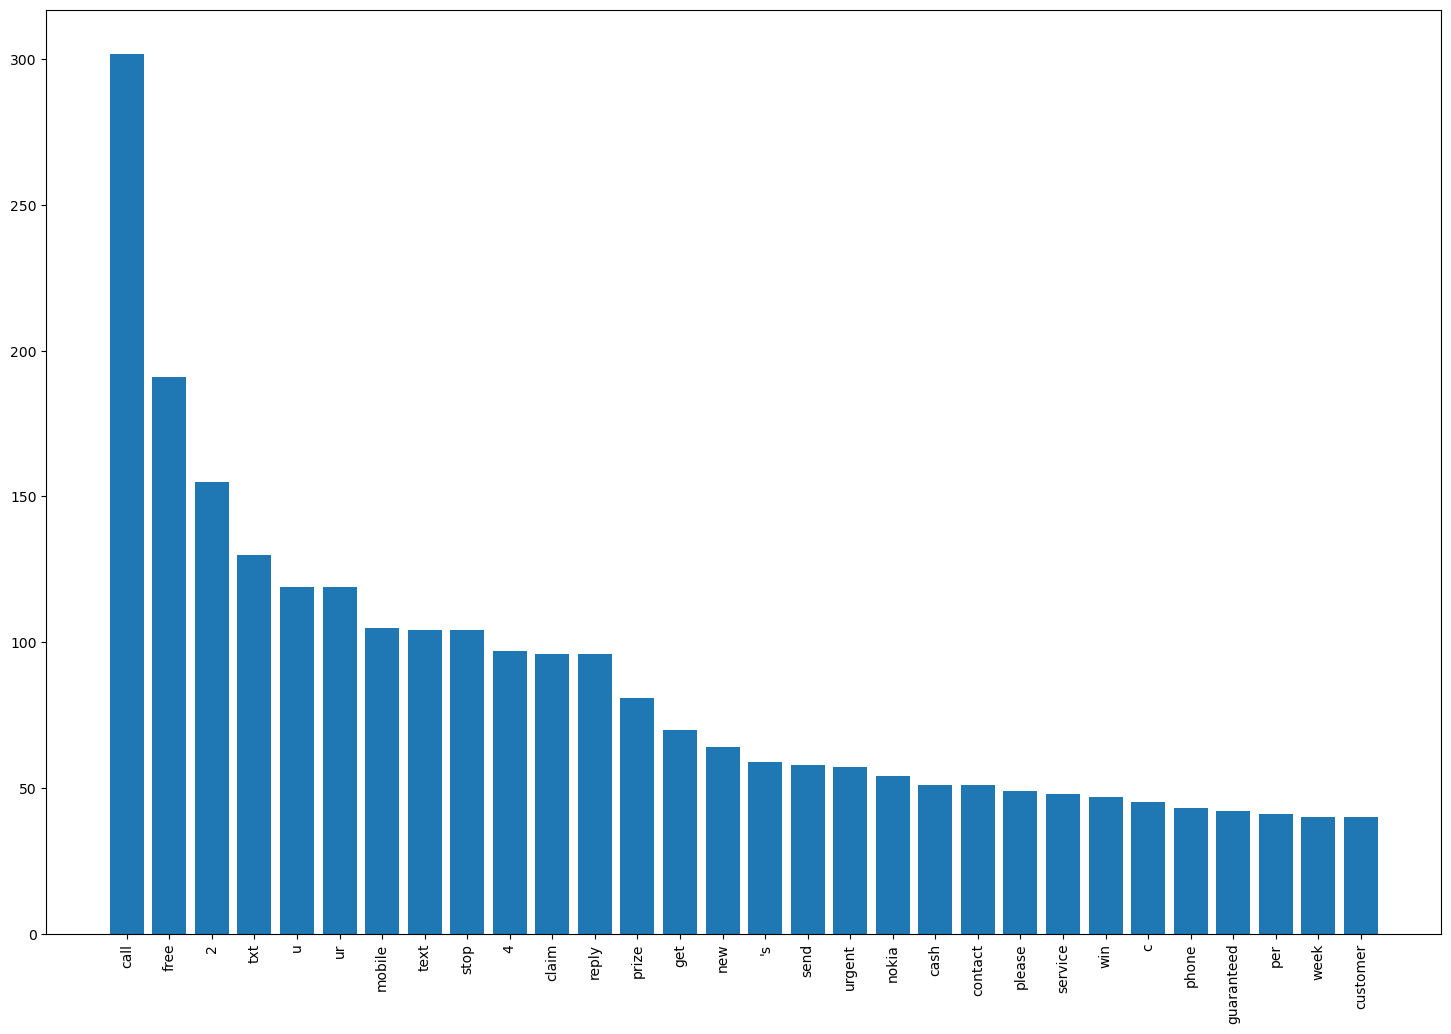

In [115]:
spam_corpus=[]
for msg in df[df['message_type']==1]['trans_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
x=Counter(spam_corpus).most_common(30)
###########
wordss = [i[0] for i in x]
freq = [i[1] for i in x]
###########
plt.figure(figsize=(18,12))
plt.bar(wordss,freq)
plt.xticks(rotation='vertical')
plt.show()

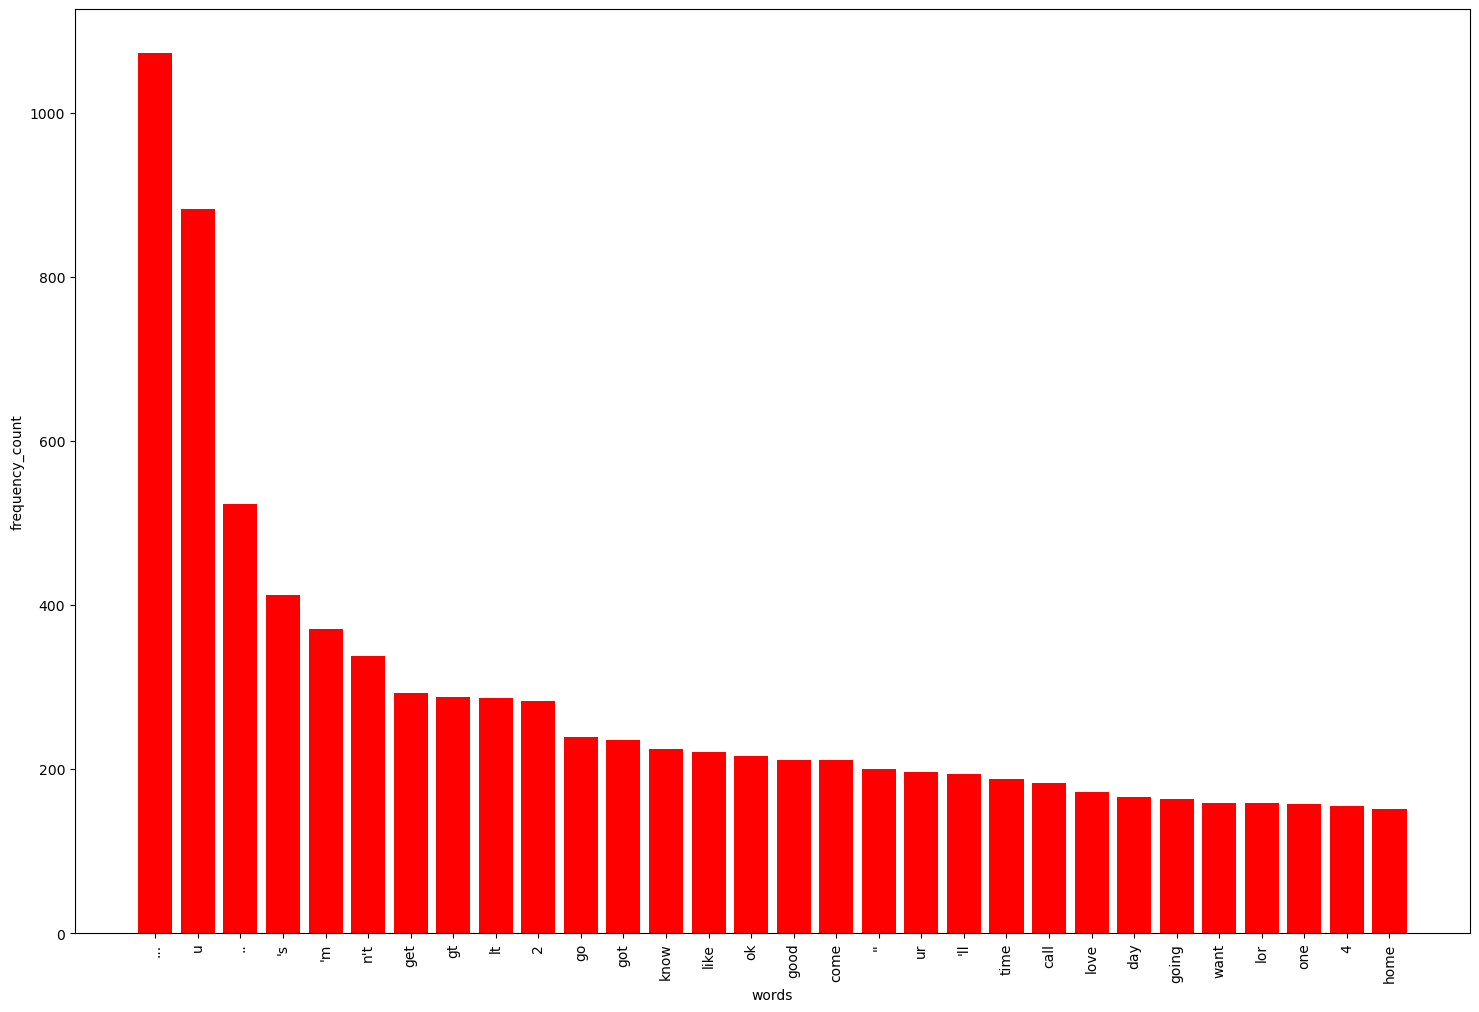

In [116]:
spam_corpus=[]
for msg in df[df['message_type']==0]['trans_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
x=Counter(spam_corpus).most_common(30)
###########
wordss = [i[0] for i in x]
freq = [i[1] for i in x]
###########
plt.figure(figsize=(18,12))
plt.bar(wordss,freq,color='red')
plt.xlabel('words')
plt.ylabel("frequency_count")
plt.title("")
plt.xticks(rotation='vertical')
plt.show()

# Building a Model using Naive Bayes
As it is known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms

Input is categorical Output is Numerical.

But as we know in the Naive Bayes algorithm the input columns should be numerical so we have to convert (VECTORIZE) the column.

How to vectorize:
Bag of Words
TFIDF
Word2vec
After trying out different techniques, I came to the conclusion that TFIDF vectorization gives the best accuracy and precision score so we will be using it.

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000) 

In [118]:
X=tfidf.fit_transform(df['trans_msg']).toarray()
y=df['message_type']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42)

In [119]:
X.shape

(5169, 3000)

In [120]:
y.shape

(5169,)

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [122]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

Now find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:



In [123]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8829787234042553
Confusion Matrix of Guassian NB is:  [[789 100]
 [ 21 124]]
Precision score of the Gaussian NB is 0.5535714285714286


In [124]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9806576402321083
Confusion Matrix of Multinomial NB is:  [[889   0]
 [ 20 125]]
Precision score of the Multinomial NB is 1.0


Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”

In [125]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9796905222437138
Confusion Matrix of Bernoulli NB is:  [[887   2]
 [ 19 126]]
Precision score of the Bernoulli NB is 0.984375


Hence we finalise the Model with MNB(Multinomial Naive Bayes) and TFIDF Vectorization.

# Building a Website

In [3]:
import pickle
import os
os.makedirs('artifacts',exist_ok=True)
model_path = os.path.join('artifacts', 'model.pkl')
pickle.dump(mnb,open(model_path,'wb'))

In [149]:
model_path_tf = os.path.join('artifacts','tfidf.pkl')
pickle.dump(tfidf,open(model_path_tf,'wb'))

In [4]:
tfidf = pickle.load(open('D:\\Projects\\spam or ham\\artifacts\\tfidf.pkl','rb'))
model = pickle.load(open('D:\\Projects\\spam or ham\\artifacts\\model.pkl','rb'))

In [13]:
message=['hi','won','price']
x=tfidf.transform(message).toarray()

In [17]:
model.predict(x[0])

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.